In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr, chi2_contingency,skew, kurtosis
from sklearn.preprocessing import LabelEncoder

Analiza dotyczyć będzie miasta Kreta

In [2]:
df = pd.read_csv('listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27966,Rental unit in Gazi · ★4.91 · 1 bedroom · 1 be...,120502,Emmanouil,NaN,Μαλεβιζίου,35.330120,25.080120,Entire home/apt,45,2,129,2023-09-20,0.88,2,357,6,00000247117
1,28970,Home in Heraklion · ★4.50 · 1 bedroom · 4 beds...,124670,Eirini,NaN,Ηρακλείου,35.339540,25.126790,Entire home/apt,70,1,53,2021-07-18,0.33,2,0,0,00000353067
2,29130,Villa in Loutra · ★5.0 · 6 bedrooms · 7 beds ·...,125281,Dimitrios,NaN,Ρεθύμνης,35.356160,24.584640,Entire home/apt,390,7,15,2023-08-10,0.13,4,30,4,1041K123K2537101
3,29849,Villa in Loutra · ★5.0 · 3 bedrooms · 4 beds ·...,125281,Dimitrios,NaN,Ρεθύμνης,35.353770,24.585670,Entire home/apt,163,3,21,2023-09-16,0.19,4,31,9,1041K123K2817101
4,29856,Bed and breakfast in Matala · ★4.0 · 1 bedroom...,128653,Dimitris,NaN,Φαιστού,34.995330,24.756540,Private room,97,1,44,2023-09-20,0.28,4,182,2,00001193488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26329,986029084509677031,Rental unit in Kouremenos · ★New · Studio · 1 ...,29214684,Claudia,NaN,Σητείας,35.210810,26.266090,Entire home/apt,60,2,0,NaN,NaN,119,364,0,1040Κ122Κ0239700
26330,986454363266088199,Rental unit in Plakias · ★New · 1 bedroom · 2 ...,128731982,Angela - Interhome Group,NaN,Αγίου Βασιλείου,35.184913,24.401388,Entire home/apt,147,1,0,NaN,NaN,133,363,0,1041K123K3042901
26331,986454364025801427,Rental unit in Plakias · ★New · 2 bedrooms · 4...,128731982,Angela - Interhome Group,NaN,Αγίου Βασιλείου,35.184913,24.401388,Entire home/apt,175,1,0,NaN,NaN,133,363,0,1041K123K3042901
26332,986454365306250497,Rental unit in Plakias · ★New · 1 bedroom · 1 ...,128731982,Angela - Interhome Group,NaN,Αγίου Βασιλείου,35.184913,24.401388,Entire home/apt,113,1,0,NaN,NaN,133,363,0,1041K123K3042901


Wczytanie oraz wyświetlenie surowych danych.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26334 entries, 0 to 26333
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26334 non-null  int64  
 1   name                            26334 non-null  object 
 2   host_id                         26334 non-null  int64  
 3   host_name                       26334 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26334 non-null  object 
 6   latitude                        26334 non-null  float64
 7   longitude                       26334 non-null  float64
 8   room_type                       26334 non-null  object 
 9   price                           26334 non-null  int64  
 10  minimum_nights                  26334 non-null  int64  
 11  number_of_reviews               26334 non-null  int64  
 12  last_review                     

Informacje na temat danych.

In [4]:
number_of_rows = df.shape[0]
number_of_rows

26334

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27966,Rental unit in Gazi · ★4.91 · 1 bedroom · 1 be...,120502,Emmanouil,NaN,Μαλεβιζίου,35.33012,25.08012,Entire home/apt,45,2,129,2023-09-20,0.88,2,357,6,00000247117
1,28970,Home in Heraklion · ★4.50 · 1 bedroom · 4 beds...,124670,Eirini,NaN,Ηρακλείου,35.33954,25.12679,Entire home/apt,70,1,53,2021-07-18,0.33,2,0,0,00000353067
2,29130,Villa in Loutra · ★5.0 · 6 bedrooms · 7 beds ·...,125281,Dimitrios,NaN,Ρεθύμνης,35.35616,24.58464,Entire home/apt,390,7,15,2023-08-10,0.13,4,30,4,1041K123K2537101
3,29849,Villa in Loutra · ★5.0 · 3 bedrooms · 4 beds ·...,125281,Dimitrios,NaN,Ρεθύμνης,35.35377,24.58567,Entire home/apt,163,3,21,2023-09-16,0.19,4,31,9,1041K123K2817101
4,29856,Bed and breakfast in Matala · ★4.0 · 1 bedroom...,128653,Dimitris,NaN,Φαιστού,34.99533,24.75654,Private room,97,1,44,2023-09-20,0.28,4,182,2,00001193488


Próbka surowych danych.

In [6]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [7]:
df['minimum_nights'].unique()

array([  2,   1,   7,   3,   4,   5,   6,   8,  20,  10,  30, 350,  17,
        14,  28,  29, 150,   9,  15,  27,  60, 500, 270,  90, 360, 100,
        50,  25,  40,  21,  70,  80,  35,  12, 365,  44, 998,  45, 109,
       406,  38,  13,  18, 200], dtype=int64)

In [8]:
df['minimum_nights'] = df['minimum_nights'].astype('category')

In [9]:
df.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license']

In [14]:
numeric_columns = ['price',  'reviews_per_month', 'number_of_reviews',   'calculated_host_listings_count','availability_365']
statistics = ['Minimum', 'Maximum', 'Mean', 'Median', '2nd Quartile', '3rd Quartile', 'Standard Deviation', 'Missing/Non-numeric Data']
stats_table = pd.DataFrame( index=numeric_columns, columns=statistics)
stats_table

,Minimum,Maximum,Mean,Median,2nd Quartile,3rd Quartile,Standard Deviation,Missing/Non-numeric Data
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews_per_month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calculated_host_listings_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Do zmiennej numeric_columns przypisałem numeryczne kolumny, które uważam że będą przydatne w dalszej analizie.

In [15]:
for column in numeric_columns:
    stats_table.at[column,'Minimum'] = df[column].min()
    stats_table.at[column, 'Maximum'] = df[column].max()
    stats_table.at[column, 'Mean'] = df[column].mean()
    stats_table.at[column,'Median'] = df[column].median()
    stats_table.at[column, '2nd Quartile'] = df[column].quantile(0.25)
    stats_table.at[column, '3rd Quartile'] = df[column].quantile(0.75)
    stats_table.at[column, 'Standard Deviation'] = df[column].std()
    stats_table.at[column, 'Missing/Non-numeric Data'] = df[column].isnull().sum()
    #    

In [16]:
stats_table

,Minimum,Maximum,Mean,Median,2nd Quartile,3rd Quartile,Standard Deviation,Missing/Non-numeric Data
price,10,80110,194.724804,98.0,65.0,183.0,661.576857,0
reviews_per_month,0.01,18.53,0.696139,0.43,0.17,0.93,0.836874,5858
number_of_reviews,0,563,16.070137,5.0,1.0,19.0,29.778686,0
calculated_host_listings_count,1,270,26.087416,4.0,1.0,12.0,56.141659,0
availability_365,0,365,195.064669,196.0,60.0,339.0,134.130218,0


Tabela ukazująca analizę danych niekategorycznych, liczbowych.

In [17]:
category_counts = df['minimum_nights'].value_counts()
most_frequent_value = df['minimum_nights'].mode().iloc[0]
frequency_of_most_frequent_value = df['minimum_nights'].value_counts().max()
unique_values_count = df['minimum_nights'].nunique()
missing_values_count = df['minimum_nights'].isnull().sum()

Analiza danych kategorycznych.

In [18]:
missing_values_summary = df.isnull().sum()
missing_values_summary

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               26334
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        5858
reviews_per_month                  5858
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                            1420
dtype: int64

In [19]:
df.drop(['neighbourhood_group'], axis=1, inplace=True)


Usuwam kolumnę w której brakuje bardzo dużo wartości.

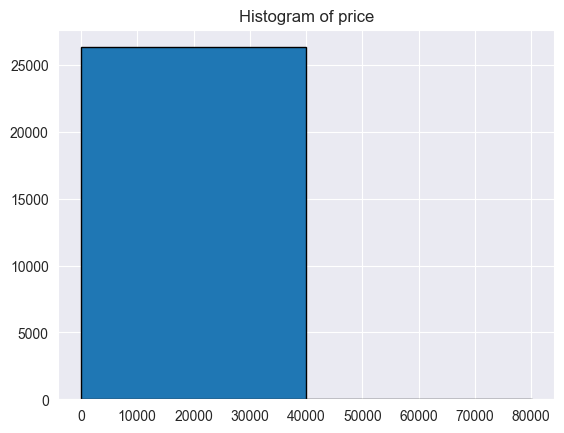

Zmienna: price
Skośność: 71.38
Kurtoza: 8148.48


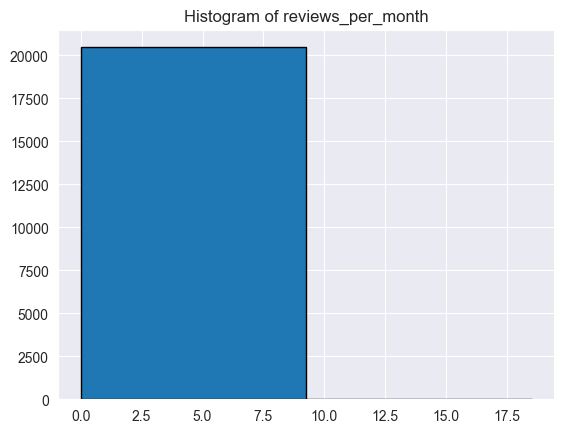

Zmienna: reviews_per_month
Skośność: 3.81
Kurtoza: 31.39


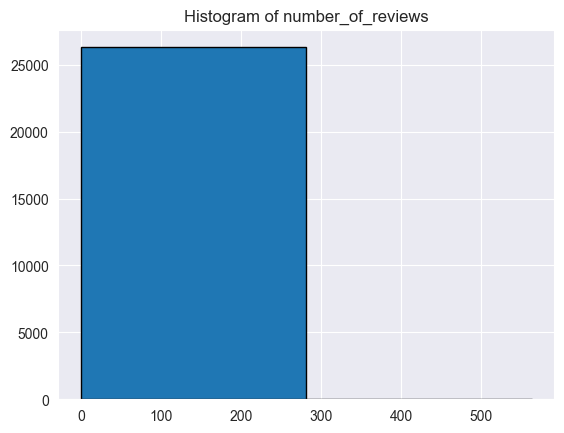

Zmienna: number_of_reviews
Skośność: 4.86
Kurtoza: 40.86


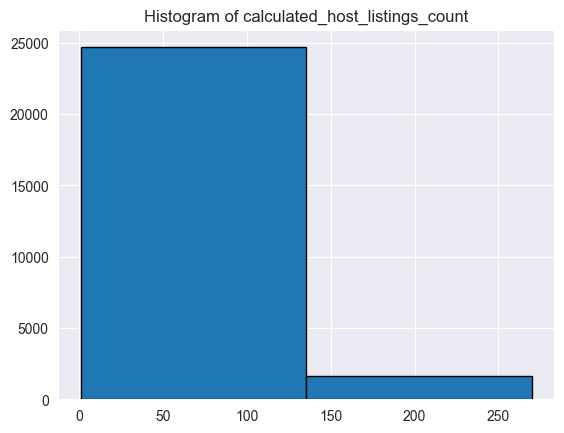

Zmienna: calculated_host_listings_count
Skośność: 2.88
Kurtoza: 7.87


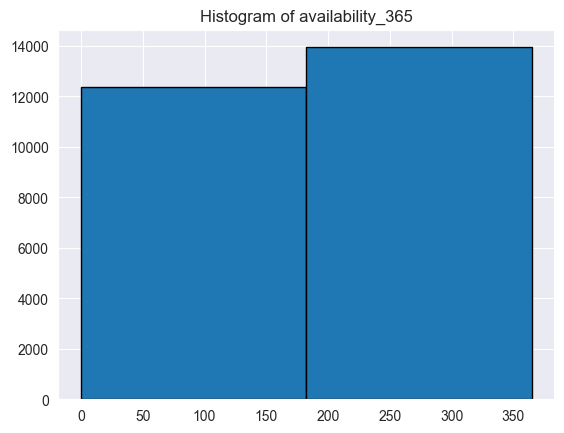

Zmienna: availability_365
Skośność: -0.13
Kurtoza: -1.48


In [26]:
for column in numeric_columns:
    
    plt.title(f'Histogram of {column}')
    plt.hist(df[column].dropna(), bins=2, edgecolor='black')
    plt.show()

    skewness = skew(df[column].dropna())
    kurt = kurtosis(df[column].dropna())

    print(f'Zmienna: {column}')
    print(f'Skośność: {skewness:.2f}')
    print(f'Kurtoza: {kurt:.2f}')
    print('\n')


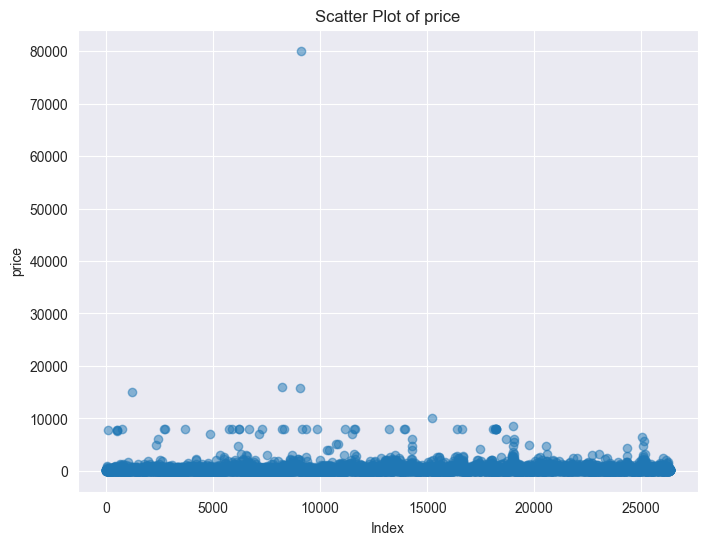

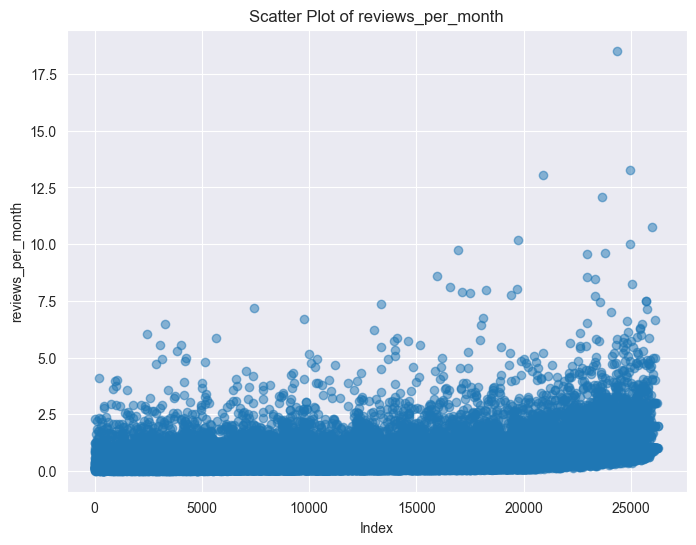

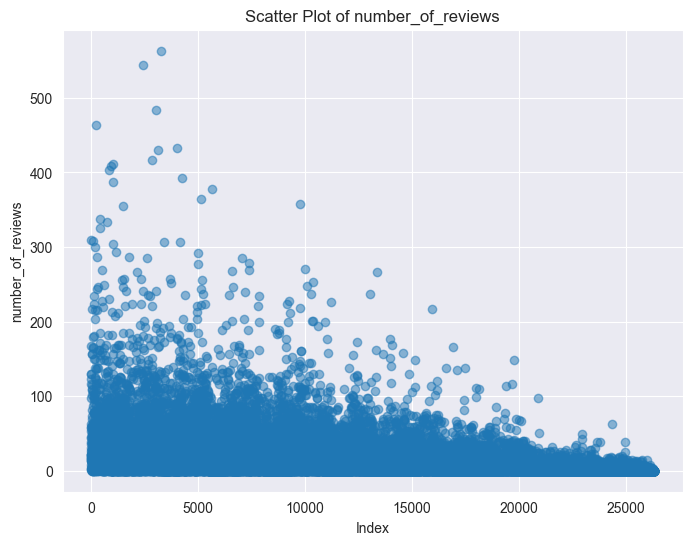

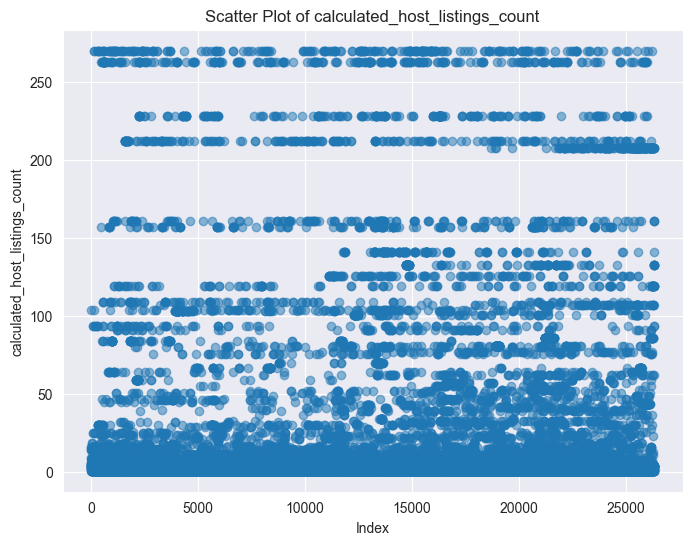

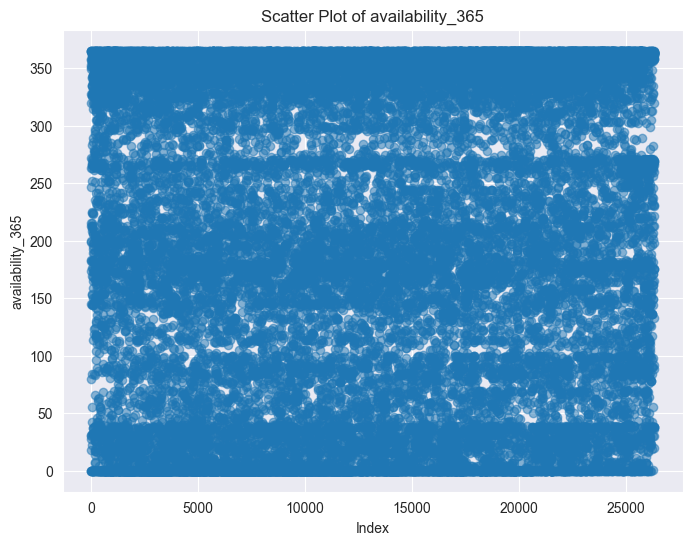

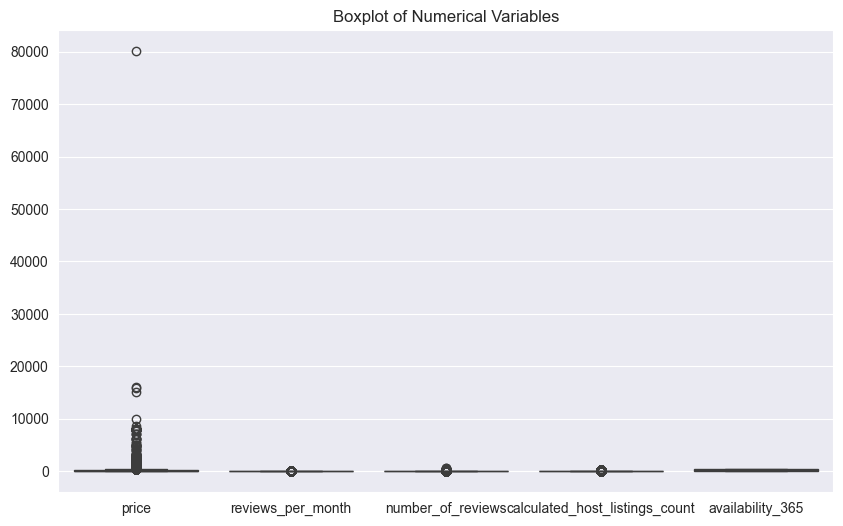

In [23]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Scatter Plot of {column}')
    plt.scatter(x=df.index, y=df[column], alpha=0.5)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot of Numerical Variables')
plt.show()

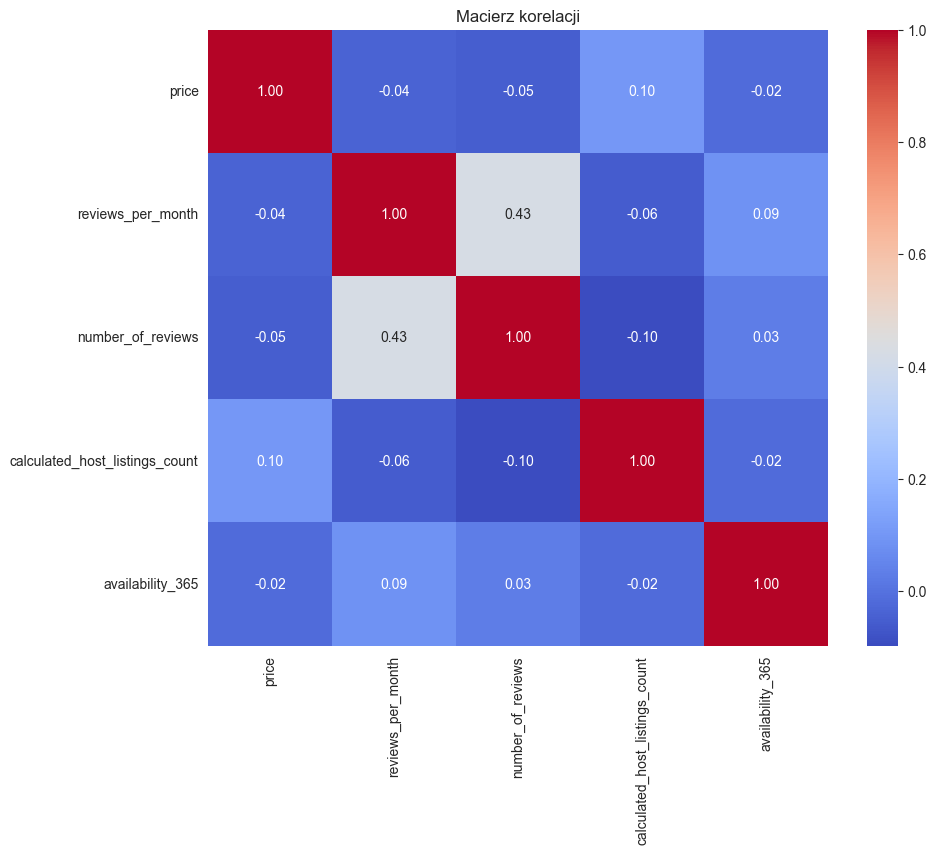

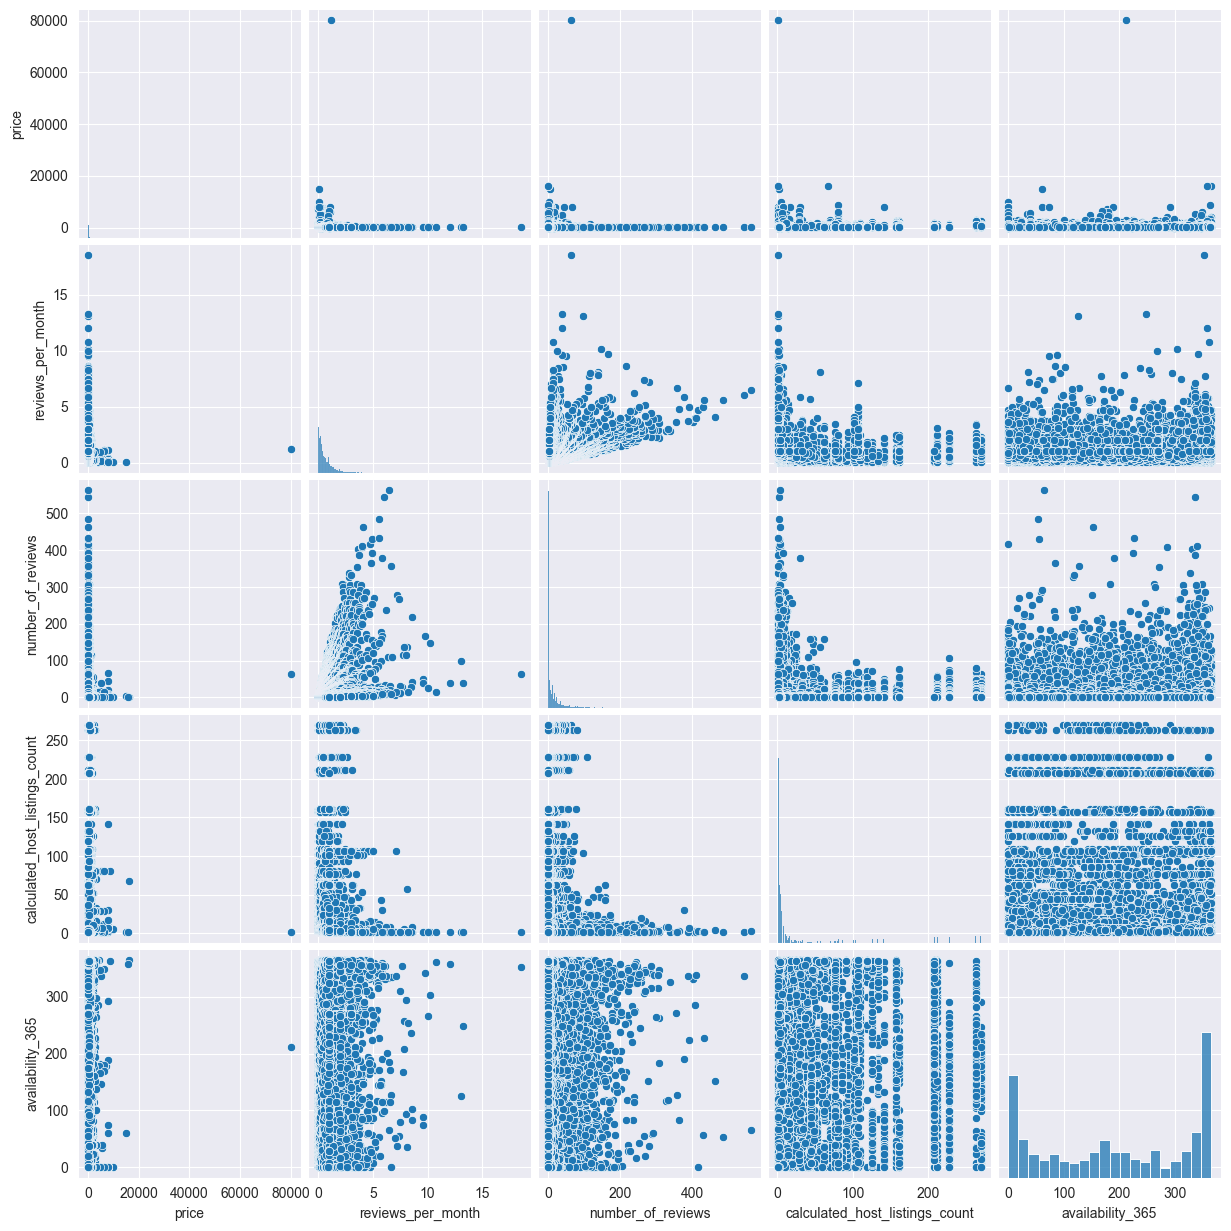

In [27]:
correlation_matrix = df[numeric_columns].corr(method='pearson')  

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

sns.pairplot(df[numeric_columns])
plt.show()





Z powyższej analizy zależności pomiedzy zmiennymi liczbowymi wynika że zmienne nie są ze sobą silnie skorelowane. Zatem nie ma potrzeby odrzucania jakiejś zmiennej na tej podstawie.